In [1]:
from torchvision.io import decode_image, read_image
#from torchvision.models import resnet50, ResNet50_Weights
from torchvision.models import vit_b_32, ViT_B_32_Weights

import torchvision.transforms as transforms
from IPython.display import display

def imshow(img):
    """ndarray 配列をインラインで Notebook 上に表示する。"""
    img = transforms.functional.to_pil_image(img)
    display(img)

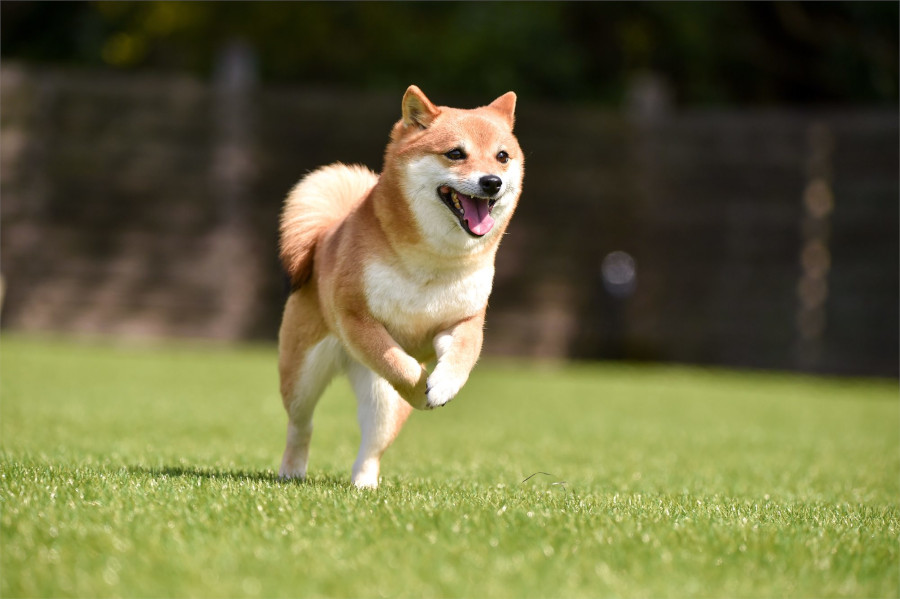

Pembroke: 55.2%


In [2]:
img = read_image("dog1.jpg")

imshow(img)

# Step 1: Initialize model with the best available weights
#weights = ResNet50_Weights.DEFAULT
#model = resnet50(weights=weights)
weights = ViT_B_32_Weights.IMAGENET1K_V1
model = vit_b_32(weights=weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
#print(prediction)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}: {100 * score:.1f}%")

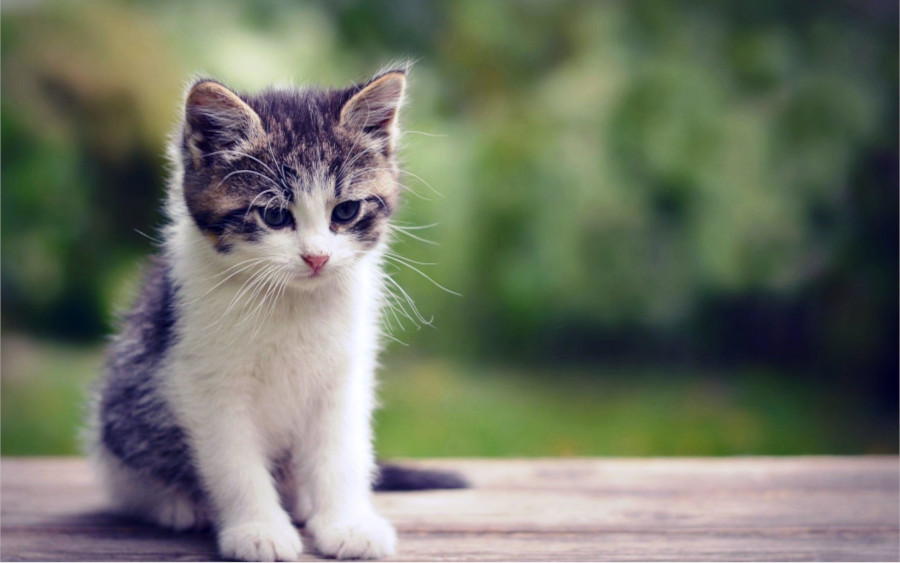

tabby: 47.5%


In [3]:
img = read_image("cat1.jpg")

imshow(img)

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
#print(prediction)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}: {100 * score:.1f}%")